## **Làm thế nào để đánh giá chất lượng của các cạnh được phát hiện bởi Canny?**


## Mục tiêu

Đánh giá chất lượng các cạnh được phát hiện bởi thuật toán Canny thông qua:
1. Đánh giá trực quan vị trí biên
2. Đánh giá cạnh giả do nhiễu
3. Đánh giá tính liên tục của cạnh
4. Đánh giá độ mảnh của cạnh (so với Sobel)
5. Đánh giá định lượng bằng Precision – Recall


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

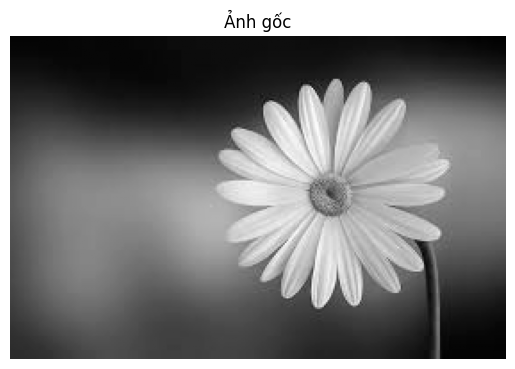

In [2]:
img = cv2.imread("C:\\Users\\PC\\Downloads\\hoa.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")


In [3]:
edges_canny = cv2.Canny(img, 50, 150)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobel_x, sobel_y)
edges_sobel = np.uint8(edges_sobel)


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

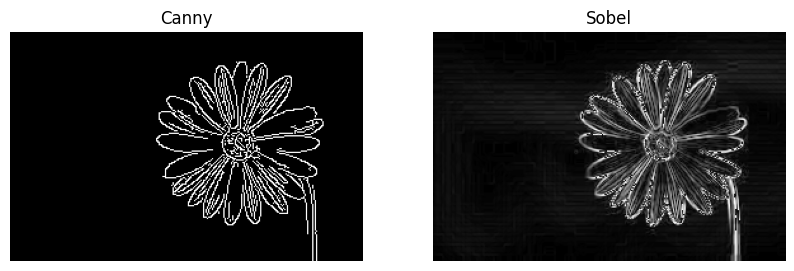

In [4]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges_sobel, cmap='gray')
plt.title("Sobel")
plt.axis("off")


## 1️ Đánh giá vị trí biên (trực quan)

Quan sát cho thấy:
- Canny bám sát biên cánh hoa và nhụy hoa
- Sobel cho biên dày và lệch nhẹ tại một số vị trí


## 2️ Đánh giá cạnh giả do nhiễu

- Sobel phát hiện nhiều cạnh ở vùng nền mờ
- Canny loại bỏ tốt nhiễu nhờ làm trơn Gaussian và hysteresis


## 3️ Đánh giá tính liên tục của cạnh

- Cạnh Canny liên tục, ít đứt đoạn
- Sobel dễ bị ngắt ở vùng gradient yếu


## 4️ Đánh giá độ mảnh của cạnh

- Sobel: cạnh dày (nhiều pixel)
- Canny: cạnh mảnh (xấp xỉ 1 pixel)

→ Canny định vị biên chính xác hơn


## 5️ Đánh giá định lượng bằng Precision – Recall

Sử dụng ảnh Ground Truth để tính Precision và Recall.


In [5]:

gt_path = r"C:\Users\PC\Downloads\hoa_edge_gt.png"  
gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

if gt is None:
    print("Không đọc được file ground truth. Kiểm tra đường dẫn!")
else:
   
    gt_resized = cv2.resize(gt, (img.shape[1], img.shape[0]))  

   
    gt_bin = (gt_resized > 128).astype(np.uint8)
    edges_bin = (edges_canny > 0).astype(np.uint8)  

  
    print("Shape edges:", edges_bin.shape)
    print("Shape gt_bin:", gt_bin.shape)

   
    TP = np.sum((edges_bin == 1) & (gt_bin == 1))
    FP = np.sum((edges_bin == 1) & (gt_bin == 0))
    FN = np.sum((edges_bin == 0) & (gt_bin == 1))

    precision = TP / (TP + FP + 1e-6)
    recall    = TP / (TP + FN + 1e-6)
    f1        = 2 * precision * recall / (precision + recall + 1e-6)

    print(f"TP: {TP},  FP: {FP},  FN: {FN}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1-score:  {f1:.3f}")

Shape edges: (181, 278)
Shape gt_bin: (181, 278)
TP: 2601,  FP: 562,  FN: 19394
Precision: 0.822
Recall:    0.118
F1-score:  0.207
